<a href="https://colab.research.google.com/github/Codedestructor56/DataScienceAndML/blob/main/LSTM_test_generation_word_label_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.callbacks import LambdaCallback
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

# **Reading the file and processing**

In [ ]:
file_path = "final_text (1).txt"
with open(file_path) as f:
  text = f.read()

In [ ]:
text = text.replace('\n', '') # removing the \n characters

In [ ]:
text[:500]

'reading companion to book 1 of the seculary of a wandering jew by paulo barata smashwords edition ***** published by : paulo barata on smashwords isbn : 9781301258857 reading companion to the the seculary of a wandering jew - book 1 - envy copyright 2013 by paulo jorge barata santos this ebook is licensed for your personal enjoyment only .  this ebook may not be re-sold or given away to other people .  if you would like to share this book with another person , please purchase an additional copy '

### **Total numbers of unique words**

In [ ]:
print('Total numbers of words are: ', len(text.split(' ')))
print('Total numbers of Unique  words are: ', len(set(text.split(' '))))

Total numbers of words are:  811869
Total numbers of Unique  words are:  39389


## **Build the LSTM model and preparing the dataset and split it into X & y**

In [ ]:
#tokenizing the sentences
from time import time
start=time()
tokenizer = Tokenizer() # Creating an object of Tokenizer
tokenizer.fit_on_texts([text]) # fiting the tikenizer with custom data
encoded_data =tokenizer.texts_to_sequences([text])[0] # converting the text to token.
end=time()
print(end-start)

1.2721474170684814


In [ ]:
len(encoded_data) #printing the len of the encodec_data

696919

In [ ]:
#Total vocabulary size.
vocab = len(tokenizer.word_index) + 1
vocab

35550

In [ ]:
# Making sequences of data for the training 
max_length = 50 + 1
Sequences = []
for i in range(max_length, len(encoded_data)):
  seq = encoded_data[i - max_length:i]
  Sequences.append(seq)
  
  # if i > 200000: # confining the sequences length to particuler range.
  #    break


print('The len of sequencs: ', len(Sequences))

The len of sequencs:  696868


In [ ]:
# Covertinf g the data into numpy array.
Sequences = np.array(Sequences)

In [ ]:
#spliting the data into input and target data.
X, y = Sequences[:, : -1], Sequences[:,-1]

In [ ]:
#Creating checkpooint saving the best model
filepath=r"Model2"
checkpoint = ModelCheckpoint(filepath, monitor ='loss',
                             verbose = 1, save_best_only = True,
                             mode ='min')

# the learning plateaus
reduce_alpha = ReduceLROnPlateau(monitor ='loss', factor = 0.2,
                              patience = 1, min_lr = 0.001)
callbacks = [checkpoint, reduce_alpha]

## **Defining lstm model**

In [ ]:
embedding_dim = 50
seq_length = X.shape[1]

model = Sequential()
model.add(Embedding(vocab, embedding_dim, input_length=seq_length)),
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(128)),
model.add(Dense(100, activation = 'relu')),
model.add(Dense(vocab, activation='softmax')),

    


# compiles model
opt= keras.optimizers.Adam(learning_rate=0.02)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            1777500   
                                                                 
 lstm (LSTM)                 (None, 50, 64)            29440     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 35550)             3590550   
                                                                 
Total params: 5,509,206
Trainable params: 5,509,206
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X, y, batch_size = 1000, epochs =100 , callbacks = callbacks)

Epoch 1/100
697/697 [==============================] - ETA: 0s - loss: 6.5036 - accuracy: 0.0865
Epoch 1: loss improved from inf to 6.50363, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 65s 82ms/step - loss: 6.5036 - accuracy: 0.0865 - lr: 0.0200
Epoch 2/100
697/697 [==============================] - ETA: 0s - loss: 5.8380 - accuracy: 0.1307
Epoch 2: loss improved from 6.50363 to 5.83802, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 83ms/step - loss: 5.8380 - accuracy: 0.1307 - lr: 0.0200
Epoch 3/100
697/697 [==============================] - ETA: 0s - loss: 5.6243 - accuracy: 0.1434
Epoch 3: loss improved from 5.83802 to 5.62430, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.6243 - accuracy: 0.1434 - lr: 0.0200
Epoch 4/100
697/697 [==============================] - ETA: 0s - loss: 5.5034 - accuracy: 0.1495
Epoch 4: loss improved from 5.62430 to 5.50342, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 84ms/step - loss: 5.5034 - accuracy: 0.1495 - lr: 0.0200
Epoch 5/100
697/697 [==============================] - ETA: 0s - loss: 5.4192 - accuracy: 0.1541
Epoch 5: loss improved from 5.50342 to 5.41922, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 84ms/step - loss: 5.4192 - accuracy: 0.1541 - lr: 0.0200
Epoch 6/100
697/697 [==============================] - ETA: 0s - loss: 5.3603 - accuracy: 0.1566
Epoch 6: loss improved from 5.41922 to 5.36030, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.3603 - accuracy: 0.1566 - lr: 0.0200
Epoch 7/100
697/697 [==============================] - ETA: 0s - loss: 5.3154 - accuracy: 0.1590
Epoch 7: loss improved from 5.36030 to 5.31543, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.3154 - accuracy: 0.1590 - lr: 0.0200
Epoch 8/100
697/697 [==============================] - ETA: 0s - loss: 5.2775 - accuracy: 0.1605
Epoch 8: loss improved from 5.31543 to 5.27752, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.2775 - accuracy: 0.1605 - lr: 0.0200
Epoch 9/100
697/697 [==============================] - ETA: 0s - loss: 5.2499 - accuracy: 0.1620
Epoch 9: loss improved from 5.27752 to 5.24988, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 84ms/step - loss: 5.2499 - accuracy: 0.1620 - lr: 0.0200
Epoch 10/100
697/697 [==============================] - ETA: 0s - loss: 5.2250 - accuracy: 0.1630
Epoch 10: loss improved from 5.24988 to 5.22503, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 5.2250 - accuracy: 0.1630 - lr: 0.0200
Epoch 11/100
697/697 [==============================] - ETA: 0s - loss: 5.2043 - accuracy: 0.1636
Epoch 11: loss improved from 5.22503 to 5.20431, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 84ms/step - loss: 5.2043 - accuracy: 0.1636 - lr: 0.0200
Epoch 12/100
697/697 [==============================] - ETA: 0s - loss: 5.1879 - accuracy: 0.1642
Epoch 12: loss improved from 5.20431 to 5.18794, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 84ms/step - loss: 5.1879 - accuracy: 0.1642 - lr: 0.0200
Epoch 13/100
697/697 [==============================] - ETA: 0s - loss: 5.1738 - accuracy: 0.1647
Epoch 13: loss improved from 5.18794 to 5.17383, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.1738 - accuracy: 0.1647 - lr: 0.0200
Epoch 14/100
697/697 [==============================] - ETA: 0s - loss: 5.1626 - accuracy: 0.1655
Epoch 14: loss improved from 5.17383 to 5.16261, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.1626 - accuracy: 0.1655 - lr: 0.0200
Epoch 15/100
697/697 [==============================] - ETA: 0s - loss: 5.1504 - accuracy: 0.1658
Epoch 15: loss improved from 5.16261 to 5.15040, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 83ms/step - loss: 5.1504 - accuracy: 0.1658 - lr: 0.0200
Epoch 16/100
697/697 [==============================] - ETA: 0s - loss: 5.1396 - accuracy: 0.1662
Epoch 16: loss improved from 5.15040 to 5.13958, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.1396 - accuracy: 0.1662 - lr: 0.0200
Epoch 17/100
697/697 [==============================] - ETA: 0s - loss: 5.1324 - accuracy: 0.1659
Epoch 17: loss improved from 5.13958 to 5.13238, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 84ms/step - loss: 5.1324 - accuracy: 0.1659 - lr: 0.0200
Epoch 18/100
697/697 [==============================] - ETA: 0s - loss: 5.1284 - accuracy: 0.1659
Epoch 18: loss improved from 5.13238 to 5.12837, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.1284 - accuracy: 0.1659 - lr: 0.0200
Epoch 19/100
697/697 [==============================] - ETA: 0s - loss: 5.1215 - accuracy: 0.1662
Epoch 19: loss improved from 5.12837 to 5.12153, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 5.1215 - accuracy: 0.1662 - lr: 0.0200
Epoch 20/100
697/697 [==============================] - ETA: 0s - loss: 5.1134 - accuracy: 0.1663
Epoch 20: loss improved from 5.12153 to 5.11345, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 84ms/step - loss: 5.1134 - accuracy: 0.1663 - lr: 0.0200
Epoch 21/100
697/697 [==============================] - ETA: 0s - loss: 5.1088 - accuracy: 0.1663
Epoch 21: loss improved from 5.11345 to 5.10883, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 84ms/step - loss: 5.1088 - accuracy: 0.1663 - lr: 0.0200
Epoch 22/100
697/697 [==============================] - ETA: 0s - loss: 5.1055 - accuracy: 0.1667
Epoch 22: loss improved from 5.10883 to 5.10550, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.1055 - accuracy: 0.1667 - lr: 0.0200
Epoch 23/100
697/697 [==============================] - ETA: 0s - loss: 5.1025 - accuracy: 0.1666
Epoch 23: loss improved from 5.10550 to 5.10247, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.1025 - accuracy: 0.1666 - lr: 0.0200
Epoch 24/100
697/697 [==============================] - ETA: 0s - loss: 5.1001 - accuracy: 0.1666
Epoch 24: loss improved from 5.10247 to 5.10011, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 5.1001 - accuracy: 0.1666 - lr: 0.0200
Epoch 25/100
697/697 [==============================] - ETA: 0s - loss: 5.0975 - accuracy: 0.1666
Epoch 25: loss improved from 5.10011 to 5.09752, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.0975 - accuracy: 0.1666 - lr: 0.0200
Epoch 26/100
697/697 [==============================] - ETA: 0s - loss: 5.0953 - accuracy: 0.1665
Epoch 26: loss improved from 5.09752 to 5.09532, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.0953 - accuracy: 0.1665 - lr: 0.0200
Epoch 27/100
697/697 [==============================] - ETA: 0s - loss: 5.0928 - accuracy: 0.1666
Epoch 27: loss improved from 5.09532 to 5.09284, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 5.0928 - accuracy: 0.1666 - lr: 0.0200
Epoch 28/100
697/697 [==============================] - ETA: 0s - loss: 5.0910 - accuracy: 0.1666
Epoch 28: loss improved from 5.09284 to 5.09097, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 83ms/step - loss: 5.0910 - accuracy: 0.1666 - lr: 0.0200
Epoch 29/100
697/697 [==============================] - ETA: 0s - loss: 5.0891 - accuracy: 0.1662
Epoch 29: loss improved from 5.09097 to 5.08908, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 5.0891 - accuracy: 0.1662 - lr: 0.0200
Epoch 30/100
697/697 [==============================] - ETA: 0s - loss: 5.0882 - accuracy: 0.1668
Epoch 30: loss improved from 5.08908 to 5.08824, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 84ms/step - loss: 5.0882 - accuracy: 0.1668 - lr: 0.0200
Epoch 31/100
697/697 [==============================] - ETA: 0s - loss: 5.0860 - accuracy: 0.1669
Epoch 31: loss improved from 5.08824 to 5.08602, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 58s 84ms/step - loss: 5.0860 - accuracy: 0.1669 - lr: 0.0200
Epoch 32/100
697/697 [==============================] - ETA: 0s - loss: 5.0889 - accuracy: 0.1664
Epoch 32: loss did not improve from 5.08602
697/697 [==============================] - 51s 74ms/step - loss: 5.0889 - accuracy: 0.1664 - lr: 0.0200
Epoch 33/100
697/697 [==============================] - ETA: 0s - loss: 4.9516 - accuracy: 0.1722
Epoch 33: loss improved from 5.08602 to 4.95162, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 4.9516 - accuracy: 0.1722 - lr: 0.0040
Epoch 34/100
697/697 [==============================] - ETA: 0s - loss: 4.9144 - accuracy: 0.1749
Epoch 34: loss improved from 4.95162 to 4.91435, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 4.9144 - accuracy: 0.1749 - lr: 0.0040
Epoch 35/100
697/697 [==============================] - ETA: 0s - loss: 4.8968 - accuracy: 0.1761
Epoch 35: loss improved from 4.91435 to 4.89678, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.8968 - accuracy: 0.1761 - lr: 0.0040
Epoch 36/100
697/697 [==============================] - ETA: 0s - loss: 4.8854 - accuracy: 0.1768
Epoch 36: loss improved from 4.89678 to 4.88543, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 4.8854 - accuracy: 0.1768 - lr: 0.0040
Epoch 37/100
697/697 [==============================] - ETA: 0s - loss: 4.8748 - accuracy: 0.1775
Epoch 37: loss improved from 4.88543 to 4.87481, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 4.8748 - accuracy: 0.1775 - lr: 0.0040
Epoch 38/100
697/697 [==============================] - ETA: 0s - loss: 4.8663 - accuracy: 0.1780
Epoch 38: loss improved from 4.87481 to 4.86632, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 4.8663 - accuracy: 0.1780 - lr: 0.0040
Epoch 39/100
697/697 [==============================] - ETA: 0s - loss: 4.8584 - accuracy: 0.1786
Epoch 39: loss improved from 4.86632 to 4.85835, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.8584 - accuracy: 0.1786 - lr: 0.0040
Epoch 40/100
697/697 [==============================] - ETA: 0s - loss: 4.8516 - accuracy: 0.1791
Epoch 40: loss improved from 4.85835 to 4.85162, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 4.8516 - accuracy: 0.1791 - lr: 0.0040
Epoch 41/100
697/697 [==============================] - ETA: 0s - loss: 4.8453 - accuracy: 0.1795
Epoch 41: loss improved from 4.85162 to 4.84534, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 4.8453 - accuracy: 0.1795 - lr: 0.0040
Epoch 42/100
697/697 [==============================] - ETA: 0s - loss: 4.8394 - accuracy: 0.1799
Epoch 42: loss improved from 4.84534 to 4.83944, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 4.8394 - accuracy: 0.1799 - lr: 0.0040
Epoch 43/100
697/697 [==============================] - ETA: 0s - loss: 4.8342 - accuracy: 0.1802
Epoch 43: loss improved from 4.83944 to 4.83420, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 4.8342 - accuracy: 0.1802 - lr: 0.0040
Epoch 44/100
697/697 [==============================] - ETA: 0s - loss: 4.8291 - accuracy: 0.1805
Epoch 44: loss improved from 4.83420 to 4.82912, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 84ms/step - loss: 4.8291 - accuracy: 0.1805 - lr: 0.0040
Epoch 45/100
697/697 [==============================] - ETA: 0s - loss: 4.8243 - accuracy: 0.1808
Epoch 45: loss improved from 4.82912 to 4.82432, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.8243 - accuracy: 0.1808 - lr: 0.0040
Epoch 46/100
697/697 [==============================] - ETA: 0s - loss: 4.8192 - accuracy: 0.1814
Epoch 46: loss improved from 4.82432 to 4.81917, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.8192 - accuracy: 0.1814 - lr: 0.0040
Epoch 47/100
697/697 [==============================] - ETA: 0s - loss: 4.8152 - accuracy: 0.1815
Epoch 47: loss improved from 4.81917 to 4.81520, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.8152 - accuracy: 0.1815 - lr: 0.0040
Epoch 48/100
697/697 [==============================] - ETA: 0s - loss: 4.8109 - accuracy: 0.1817
Epoch 48: loss improved from 4.81520 to 4.81092, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.8109 - accuracy: 0.1817 - lr: 0.0040
Epoch 49/100
697/697 [==============================] - ETA: 0s - loss: 4.8065 - accuracy: 0.1820
Epoch 49: loss improved from 4.81092 to 4.80651, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.8065 - accuracy: 0.1820 - lr: 0.0040
Epoch 50/100
697/697 [==============================] - ETA: 0s - loss: 4.8015 - accuracy: 0.1824
Epoch 50: loss improved from 4.80651 to 4.80153, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.8015 - accuracy: 0.1824 - lr: 0.0040
Epoch 51/100
697/697 [==============================] - ETA: 0s - loss: 4.7966 - accuracy: 0.1827
Epoch 51: loss improved from 4.80153 to 4.79661, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7966 - accuracy: 0.1827 - lr: 0.0040
Epoch 52/100
697/697 [==============================] - ETA: 0s - loss: 4.7931 - accuracy: 0.1829
Epoch 52: loss improved from 4.79661 to 4.79311, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7931 - accuracy: 0.1829 - lr: 0.0040
Epoch 53/100
697/697 [==============================] - ETA: 0s - loss: 4.7882 - accuracy: 0.1830
Epoch 53: loss improved from 4.79311 to 4.78820, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7882 - accuracy: 0.1830 - lr: 0.0040
Epoch 54/100
697/697 [==============================] - ETA: 0s - loss: 4.7847 - accuracy: 0.1833
Epoch 54: loss improved from 4.78820 to 4.78467, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7847 - accuracy: 0.1833 - lr: 0.0040
Epoch 55/100
697/697 [==============================] - ETA: 0s - loss: 4.7813 - accuracy: 0.1834
Epoch 55: loss improved from 4.78467 to 4.78125, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7813 - accuracy: 0.1834 - lr: 0.0040
Epoch 56/100
697/697 [==============================] - ETA: 0s - loss: 4.7772 - accuracy: 0.1838
Epoch 56: loss improved from 4.78125 to 4.77723, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7772 - accuracy: 0.1838 - lr: 0.0040
Epoch 57/100
697/697 [==============================] - ETA: 0s - loss: 4.7743 - accuracy: 0.1837
Epoch 57: loss improved from 4.77723 to 4.77428, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7743 - accuracy: 0.1837 - lr: 0.0040
Epoch 58/100
697/697 [==============================] - ETA: 0s - loss: 4.7707 - accuracy: 0.1841
Epoch 58: loss improved from 4.77428 to 4.77073, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7707 - accuracy: 0.1841 - lr: 0.0040
Epoch 59/100
697/697 [==============================] - ETA: 0s - loss: 4.7677 - accuracy: 0.1840
Epoch 59: loss improved from 4.77073 to 4.76772, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 85ms/step - loss: 4.7677 - accuracy: 0.1840 - lr: 0.0040
Epoch 60/100
697/697 [==============================] - ETA: 0s - loss: 4.7646 - accuracy: 0.1845
Epoch 60: loss improved from 4.76772 to 4.76463, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7646 - accuracy: 0.1845 - lr: 0.0040
Epoch 61/100
697/697 [==============================] - ETA: 0s - loss: 4.7617 - accuracy: 0.1846
Epoch 61: loss improved from 4.76463 to 4.76174, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7617 - accuracy: 0.1846 - lr: 0.0040
Epoch 62/100
697/697 [==============================] - ETA: 0s - loss: 4.7589 - accuracy: 0.1848
Epoch 62: loss improved from 4.76174 to 4.75893, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7589 - accuracy: 0.1848 - lr: 0.0040
Epoch 63/100
697/697 [==============================] - ETA: 0s - loss: 4.7568 - accuracy: 0.1851
Epoch 63: loss improved from 4.75893 to 4.75681, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7568 - accuracy: 0.1851 - lr: 0.0040
Epoch 64/100
697/697 [==============================] - ETA: 0s - loss: 4.7536 - accuracy: 0.1854
Epoch 64: loss improved from 4.75681 to 4.75360, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7536 - accuracy: 0.1854 - lr: 0.0040
Epoch 65/100
697/697 [==============================] - ETA: 0s - loss: 4.7504 - accuracy: 0.1855
Epoch 65: loss improved from 4.75360 to 4.75040, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7504 - accuracy: 0.1855 - lr: 0.0040
Epoch 66/100
697/697 [==============================] - ETA: 0s - loss: 4.7486 - accuracy: 0.1858
Epoch 66: loss improved from 4.75040 to 4.74859, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7486 - accuracy: 0.1858 - lr: 0.0040
Epoch 67/100
697/697 [==============================] - ETA: 0s - loss: 4.7462 - accuracy: 0.1857
Epoch 67: loss improved from 4.74859 to 4.74620, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7462 - accuracy: 0.1857 - lr: 0.0040
Epoch 68/100
697/697 [==============================] - ETA: 0s - loss: 4.7435 - accuracy: 0.1859
Epoch 68: loss improved from 4.74620 to 4.74345, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7435 - accuracy: 0.1859 - lr: 0.0040
Epoch 69/100
697/697 [==============================] - ETA: 0s - loss: 4.7415 - accuracy: 0.1859
Epoch 69: loss improved from 4.74345 to 4.74149, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7415 - accuracy: 0.1859 - lr: 0.0040
Epoch 70/100
697/697 [==============================] - ETA: 0s - loss: 4.7395 - accuracy: 0.1860
Epoch 70: loss improved from 4.74149 to 4.73952, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 85ms/step - loss: 4.7395 - accuracy: 0.1860 - lr: 0.0040
Epoch 71/100
697/697 [==============================] - ETA: 0s - loss: 4.7374 - accuracy: 0.1862
Epoch 71: loss improved from 4.73952 to 4.73741, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 85ms/step - loss: 4.7374 - accuracy: 0.1862 - lr: 0.0040
Epoch 72/100
697/697 [==============================] - ETA: 0s - loss: 4.7349 - accuracy: 0.1866
Epoch 72: loss improved from 4.73741 to 4.73486, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 85ms/step - loss: 4.7349 - accuracy: 0.1866 - lr: 0.0040
Epoch 73/100
697/697 [==============================] - ETA: 0s - loss: 4.7339 - accuracy: 0.1866
Epoch 73: loss improved from 4.73486 to 4.73385, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 85ms/step - loss: 4.7339 - accuracy: 0.1866 - lr: 0.0040
Epoch 74/100
697/697 [==============================] - ETA: 0s - loss: 4.7305 - accuracy: 0.1868
Epoch 74: loss improved from 4.73385 to 4.73051, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 85ms/step - loss: 4.7305 - accuracy: 0.1868 - lr: 0.0040
Epoch 75/100
697/697 [==============================] - ETA: 0s - loss: 4.7286 - accuracy: 0.1869
Epoch 75: loss improved from 4.73051 to 4.72858, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7286 - accuracy: 0.1869 - lr: 0.0040
Epoch 76/100
697/697 [==============================] - ETA: 0s - loss: 4.7270 - accuracy: 0.1871
Epoch 76: loss improved from 4.72858 to 4.72702, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7270 - accuracy: 0.1871 - lr: 0.0040
Epoch 77/100
697/697 [==============================] - ETA: 0s - loss: 4.7248 - accuracy: 0.1868
Epoch 77: loss improved from 4.72702 to 4.72478, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 59s 85ms/step - loss: 4.7248 - accuracy: 0.1868 - lr: 0.0040
Epoch 78/100
697/697 [==============================] - ETA: 0s - loss: 4.7221 - accuracy: 0.1876
Epoch 78: loss improved from 4.72478 to 4.72207, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 85ms/step - loss: 4.7221 - accuracy: 0.1876 - lr: 0.0040
Epoch 79/100
697/697 [==============================] - ETA: 0s - loss: 4.7208 - accuracy: 0.1875
Epoch 79: loss improved from 4.72207 to 4.72082, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7208 - accuracy: 0.1875 - lr: 0.0040
Epoch 80/100
697/697 [==============================] - ETA: 0s - loss: 4.7207 - accuracy: 0.1872
Epoch 80: loss improved from 4.72082 to 4.72066, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7207 - accuracy: 0.1872 - lr: 0.0040
Epoch 81/100
697/697 [==============================] - ETA: 0s - loss: 4.7177 - accuracy: 0.1876
Epoch 81: loss improved from 4.72066 to 4.71767, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7177 - accuracy: 0.1876 - lr: 0.0040
Epoch 82/100
697/697 [==============================] - ETA: 0s - loss: 4.7163 - accuracy: 0.1878
Epoch 82: loss improved from 4.71767 to 4.71635, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7163 - accuracy: 0.1878 - lr: 0.0040
Epoch 83/100
697/697 [==============================] - ETA: 0s - loss: 4.7138 - accuracy: 0.1881
Epoch 83: loss improved from 4.71635 to 4.71380, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7138 - accuracy: 0.1881 - lr: 0.0040
Epoch 84/100
697/697 [==============================] - ETA: 0s - loss: 4.7123 - accuracy: 0.1880
Epoch 84: loss improved from 4.71380 to 4.71226, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7123 - accuracy: 0.1880 - lr: 0.0040
Epoch 85/100
697/697 [==============================] - ETA: 0s - loss: 4.7108 - accuracy: 0.1882
Epoch 85: loss improved from 4.71226 to 4.71082, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7108 - accuracy: 0.1882 - lr: 0.0040
Epoch 86/100
697/697 [==============================] - ETA: 0s - loss: 4.7091 - accuracy: 0.1881
Epoch 86: loss improved from 4.71082 to 4.70913, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7091 - accuracy: 0.1881 - lr: 0.0040
Epoch 87/100
697/697 [==============================] - ETA: 0s - loss: 4.7083 - accuracy: 0.1883
Epoch 87: loss improved from 4.70913 to 4.70826, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7083 - accuracy: 0.1883 - lr: 0.0040
Epoch 88/100
697/697 [==============================] - ETA: 0s - loss: 4.7068 - accuracy: 0.1884
Epoch 88: loss improved from 4.70826 to 4.70684, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7068 - accuracy: 0.1884 - lr: 0.0040
Epoch 89/100
697/697 [==============================] - ETA: 0s - loss: 4.7050 - accuracy: 0.1886
Epoch 89: loss improved from 4.70684 to 4.70497, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7050 - accuracy: 0.1886 - lr: 0.0040
Epoch 90/100
697/697 [==============================] - ETA: 0s - loss: 4.7031 - accuracy: 0.1888
Epoch 90: loss improved from 4.70497 to 4.70312, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7031 - accuracy: 0.1888 - lr: 0.0040
Epoch 91/100
697/697 [==============================] - ETA: 0s - loss: 4.7026 - accuracy: 0.1886
Epoch 91: loss improved from 4.70312 to 4.70264, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7026 - accuracy: 0.1886 - lr: 0.0040
Epoch 92/100
697/697 [==============================] - ETA: 0s - loss: 4.7008 - accuracy: 0.1888
Epoch 92: loss improved from 4.70264 to 4.70082, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.7008 - accuracy: 0.1888 - lr: 0.0040
Epoch 93/100
697/697 [==============================] - ETA: 0s - loss: 4.6996 - accuracy: 0.1888
Epoch 93: loss improved from 4.70082 to 4.69960, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.6996 - accuracy: 0.1888 - lr: 0.0040
Epoch 94/100
697/697 [==============================] - ETA: 0s - loss: 4.6974 - accuracy: 0.1892
Epoch 94: loss improved from 4.69960 to 4.69739, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 87ms/step - loss: 4.6974 - accuracy: 0.1892 - lr: 0.0040
Epoch 95/100
697/697 [==============================] - ETA: 0s - loss: 4.6960 - accuracy: 0.1892
Epoch 95: loss improved from 4.69739 to 4.69599, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.6960 - accuracy: 0.1892 - lr: 0.0040
Epoch 96/100
697/697 [==============================] - ETA: 0s - loss: 4.6949 - accuracy: 0.1891
Epoch 96: loss improved from 4.69599 to 4.69494, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.6949 - accuracy: 0.1891 - lr: 0.0040
Epoch 97/100
697/697 [==============================] - ETA: 0s - loss: 4.6931 - accuracy: 0.1895
Epoch 97: loss improved from 4.69494 to 4.69308, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.6931 - accuracy: 0.1895 - lr: 0.0040
Epoch 98/100
697/697 [==============================] - ETA: 0s - loss: 4.6916 - accuracy: 0.1896
Epoch 98: loss improved from 4.69308 to 4.69162, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.6916 - accuracy: 0.1896 - lr: 0.0040
Epoch 99/100
697/697 [==============================] - ETA: 0s - loss: 4.6897 - accuracy: 0.1897
Epoch 99: loss improved from 4.69162 to 4.68973, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.6897 - accuracy: 0.1897 - lr: 0.0040
Epoch 100/100
697/697 [==============================] - ETA: 0s - loss: 4.6891 - accuracy: 0.1896
Epoch 100: loss improved from 4.68973 to 4.68907, saving model to C:\Users\Lenovo\Desktop\Model2


697/697 [==============================] - 60s 86ms/step - loss: 4.6891 - accuracy: 0.1896 - lr: 0.0040


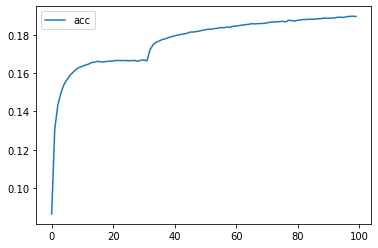

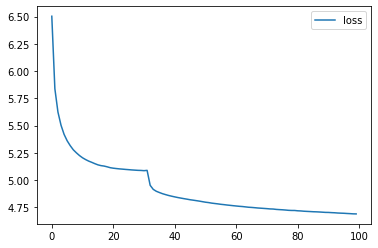

In [ ]:
#Ploting the model result
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()


In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

In [ ]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            1777500   
                                                                 
 lstm (LSTM)                 (None, 50, 64)            29440     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 35550)             3590550   
                                                                 
Total params: 5,509,206
Trainable params: 5,509,206
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#testing
from numpy import ndarray
new=np.ones((1,35550))
new=np.asarray(new).astype('float64')
new=new/np.sum(new)
new=new.flatten()
probas=np.random.multinomial(1,new,1)[0]
probas=probas.reshape(-1,35550)
print(probas.shape)

(1, 35550)


## **Function for predicting for generating the word**

In [ ]:
#Function for generating text
from numpy import ndarray
def sample(preds, temperature=0.9):
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds) / temperature
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  preds=preds.flatten()
  probas=np.random.multinomial(1,preds,1)[0]
  probas=probas.reshape(-1,35550)
  return probas

def text_generate(model, tokenizer, input_text, n_pred):
  in_text, result = input_text, input_text
  #in_text = [input_text]
  #looping over for n_numbers of words

  for i in range(n_pred): 
    encoded = tokenizer.texts_to_sequences([in_text])[0]
    encoded = pad_sequences([encoded], maxlen=50)
    y_prediction = sample(model.predict(encoded))
    predicted_word = ''
    for word, index in tokenizer.word_index.items():
      if np.argmax(y_prediction) == index:
        predicted_word = word
        #print(predicted_word)
        break
    in_text  = in_text + ' ' + predicted_word
    result =  result + ' ' + predicted_word

  return result





In [ ]:
text_generate(new_model, tokenizer, 'i love romantic', 400)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


"i love romantic and the creature stuffs with the pictureshe had been between him and to james that he matched her but they were a chance to burst on the floor and they gave him enough to tend to my food staring at the picture and waved his knees on ronson 's arm and watched down while shamus and trynnadon led that the computer then lowered his mug nervously leaving the woman was down the sun mocked you to walk '' said blake that 's a scholarship '' i 'm awful after her is you '' yeah are you what you think in '' said teriathey are no chance '' said lucy she cast my gun on the couch to meet him and surprise her she leaned over the counter i 'm almost surprised it 's just anything i mean that we have no size of some train was enough recently the great b the effects of the white dragonfly growths ralph ii had a gourmet long foot of pure determination and interview it is n't the time arise ' clay added not my answer confidentially it was a prudeclyde had alluded to some from the dungeon o

In [ ]:
x = tokenizer.word_index
# list out keys and values separately
key_list = list(x.keys())
val_list = list(x.values())
 
# print key with val 100
position = val_list.index(208)
print(key_list[position])

love
